In [204]:
import os
import pandas as pd
import pandas_profiling as pf
import numpy as np
import matplotlib.pyplot as plt

In [83]:
#Initializing file paths
raw_dir = os.path.join(os.pardir,os.pardir,'data','raw')
processed_dir = os.path.join(os.pardir,os.pardir,'data','processed')

In [84]:
train_data = os.path.join(raw_dir,'cs-training.csv')
test_data = os.path.join(raw_dir,'cs-test.csv')

In [85]:
# Opening the data dictionary to understand the data attributes
data_dict = pd.read_excel(os.path.join(raw_dir,'Data Dictionary.xls'))

In [86]:
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [87]:
train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [88]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [89]:
train_df.drop(train_df.columns[[0]], axis=1, inplace=True)

In [90]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [91]:
# pf.ProfileReport(train_df)

In [92]:
train_df.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [93]:
# Checking for missing values
train_df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [94]:
train_df.dropna(inplace=True)

In [95]:
# Checking that all missing values were dropped
train_df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [96]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [97]:
# Why are there individuals with age=0? Is it possible to have data for an unborn child?
train_df[train_df.age == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


Examining the entry it does not make sense that an individual with age 0 has dependents. We assume this was an erronous entry so we will delete this single record.

In [98]:
train_df.drop(index=65695,inplace=True)

In [99]:
# Rechecking that the row with a zero age was dropped
train_df[train_df.age == 0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In analysing this nutritional label we assumed age to be the protected attribute for which we are carrying out our analysis. Also we will add some possible latent features we believe the model can learn

In [100]:
def age_class(age):
    if age < 18 :
        return 'child'
    if age < 35:
        return 'youth'
    if age < 60:
        return 'middle-age'
    else:
        return 'senior'

In [101]:
train_df['age_class'] = train_df['age'].apply(lambda x: age_class(x))

In [102]:
train_df['has_dependents'] = train_df['NumberOfDependents'].apply(lambda x: x > 0)

In [103]:
train_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_class,has_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,middle-age,True
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,middle-age,True
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,middle-age,False
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,youth,False
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,middle-age,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,middle-age,False
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,senior,False
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,middle-age,True
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,youth,False


##### Analysis of Features

###### SeriousDlqin2yrs
`SeriousDlqin2yrs` which according to the data dictionary means a *Person experienced 90 days past due delinquency or worse*. Essentially the individual have defaulted in paying back a loan by 90 days or more in the past 2 years. 

In [74]:
# Lets examine how many individuals defaulted on loans for atleast 90days in within 2 years
train_df.SeriousDlqin2yrs.value_counts()

0    111911
1      8357
Name: SeriousDlqin2yrs, dtype: int64

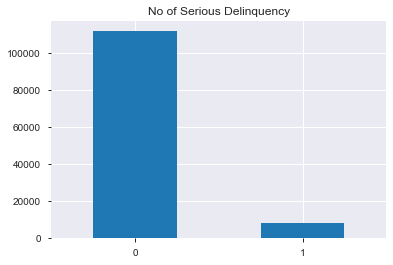

In [110]:
train_df.SeriousDlqin2yrs.value_counts().plot(kind='bar',rot=0,title='No of Serious Delinquency')

From what we can see most individuals in the population did not violate loan repayment by 90 days or more within a 2 year period. But this means the data is really skewed and this will potentially have a really huge effect on the result of the ADS if not properly handled.

###### MonthlyIncome
The monthly income of the individual

In [138]:
train_df[['MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyIncome,120268.0,6670.22681,14384.733888,0.0,3400.0,5400.0,8249.0,3008750.0


From what we see 75% of the population has less than $8500 in monthly income. To further understand this set of people lets examine them closely

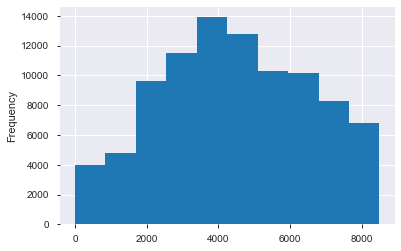

In [142]:
train_df.MonthlyIncome[train_df.MonthlyIncome<8500].plot(kind='hist')

In [174]:
# Percentage of the population earning less than 15000 per month.
(f"Percentage of population earning less than $15000: {train_df.MonthlyIncome[train_df.MonthlyIncome<15000].count()/train_df.MonthlyIncome.count()}")

'Percentage of population earning less than $15000: 0.9525310140685802'

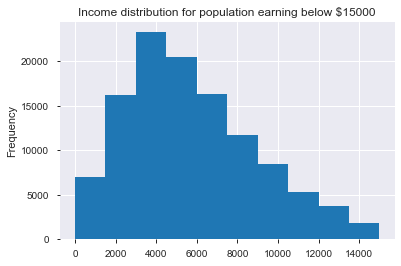

In [175]:
train_df.MonthlyIncome[train_df.MonthlyIncome<15000].plot(kind='hist',title='Income distribution for population earning below $15000')

##### DebtRatio
Monthly debt payments, alimony,living costs divided by monthy gross income.   
**DebtRatio == 0**: means individual is debt free.(**debt free**)  
**DebtRatio > 0 and DebtRatio < 1**: means individual makes more money than the debt they owe (**fair indebtedness**)  
**DebtRatio == 1**: means individual makes enough money to repay just their loans if then don't spend on anything else (**high indebtedness**)  
**DebtRatio > 1**: mean individual owes more money than they earn monthly (**excessive indebtedness**)

In [179]:
train_df[['DebtRatio']].describe().T

,count,mean,std,min,25%,50%,75%,max
DebtRatio,120268.0,26.598995,424.448215,0.0,0.143388,0.296021,0.48256,61106.5


In [231]:
# Creating a feature to categorize indebtedness
def measure_indebtedness(debt_ratio):
    if debt_ratio == 0:
        return 'debt-free'
    if debt_ratio > 0 and debt_ratio < 1:
        return 'fair'
    if debt_ratio == 1:
        return 'high'
    if debt_ratio > 1:
        return 'excess'
    
debt_class = {}

debt_class['debt-free'] = train_df['DebtRatio'][train_df['DebtRatio'] == 0].count()
debt_class['fair'] = train_df['DebtRatio'][train_df['DebtRatio'] < 1].count() - train_df['DebtRatio'][train_df['DebtRatio'] == 0].count()
debt_class['high'] = train_df['DebtRatio'][train_df['DebtRatio'] == 1].count()
debt_class['excess'] = train_df['DebtRatio'][train_df['DebtRatio'] == 0].count()

In [232]:
train_df['DebtClass'] = train_df['DebtRatio'].apply(lambda x: measure_indebtedness(x))

In [238]:
train_df['DebtClass'].value_counts()

fair         110520
excess         7233
debt-free      2491
high             24
Name: DebtClass, dtype: int64

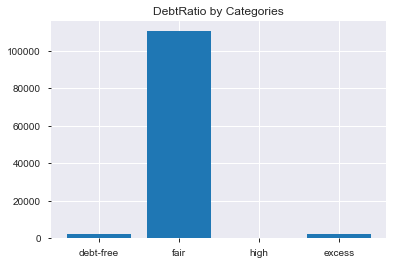

In [240]:
plt.bar(debt_class.keys(),debt_class.values())
plt.title('DebtRatio by Categories')
plt.show()

It is clear that a huge percentage of the population have fair debts while percentage of those that are debt-free and in excessive debt are roughly almos

###### Age
Age of the individual

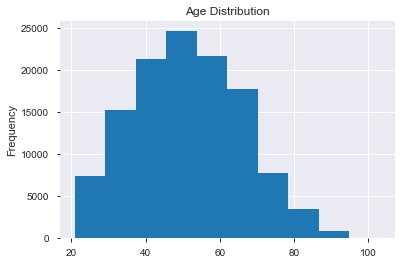

In [108]:
# Looking at age distribution from a high level
train_df.age.plot(kind='hist',title='Age Distribution')

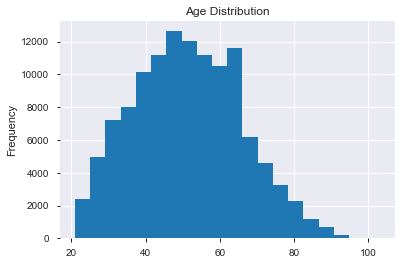

In [119]:
# To further zoom in on age lets break down the size of the bins even further
train_df.age.plot(kind='hist',title='Age Distribution', bins=20)

Examining the chart we see that `Age` which is a protected attribute in our analysis somewhat appears to follow a normal distribution here. However the second chart further revealed a sharp decline in the number of population above 65 years. This could be that as most individuals in this age bracket are mostly retired and a good number could be living off their 401k savings which reduces the need for credit/loan facilities.

###### Age Class
Age class is an engineered feature we added to further understand the potential underlying effect age could have on the ADS.

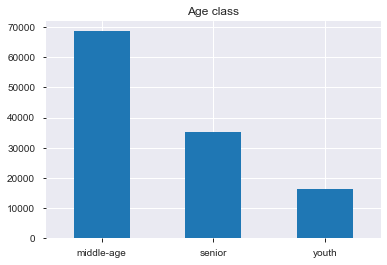

In [117]:
# Looking a plot of age class
train_df.age_class.value_counts().plot(kind='bar', rot=0, title='Age class')

 While the middle-age population appeared to be most represented while youths were the least represented the youths are least represented.

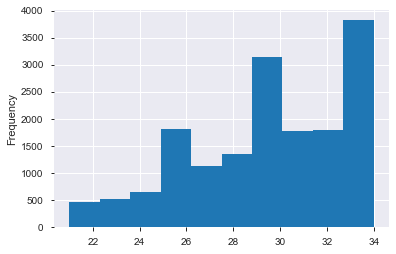

In [122]:
# Looking at the age distribution of the youthful population
train_df.age[train_df.age_class=='youth'].plot(kind='hist')

There appears to be 3 very striking ages bands here: 25-26, 29-30 and 33-34. What could this mean? It could be that this is linked to important event in the lives of young adults like graduation(refinancing student loans), buying a home, buying a new car etc all of which usually is a period alot of youths take out loans.

In [118]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'age_class', 'has_dependents'],
      dtype='object')

In [120]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'age_class', 'has_dependents'],
      dtype='object')

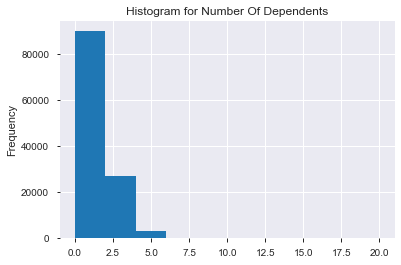

In [106]:
# Lets examine the population and the distribution of dependents
train_df['NumberOfDependents'].plot(kind='hist', title='Histogram for Number Of Dependents')